In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
#path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident/no_preprocessing')
path = Path('/nfs/research/ejguill/data/autopsy/no_preprocessing/folds/tmp')


In [4]:
df = pd.read_csv(path/'data.csv')
#df.head()

In [5]:
#df.tail()

In [6]:
bs=32

In [7]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', bs=bs)

In [8]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxup heart : xxmaj myocyte hypertrophy , interstitial fibrosis \n\n xxup lungs : xxmaj peripherally dilated alveolar spaces with septal clubbing alternating with areas of atelectasis ; mild deposition of black pigment around bronchioles and pleura \n\n xxup kidneys : xxmaj frequent , globally sclerotic glomeruli ; patchy interstitial fibrosis ; patchy interstitial lymphocytic inflammation \n\n xxup liver : xxmaj minimal , predominantly macrovesicular",Homicide
"xxbos \n xxup .micro . \n xxup heart - xxmaj no significant histopathology \n\n xxup lungs - xxmaj focal areas of collapsed parenchyma , intra - alveolar hemorrhage and scattered hemosiderin laden macrophages . \n\n xxup liver - xxmaj multifocal lymphocytic infiltrates in portal tracts . \n\n xxup kidney - xxmaj no significant histopathology . \n\n xxup brain ( left hippocampus ) - xxmaj subarachnoid hemorrhage \n .locationextremity \n .injuryblunt",Homicide
xxbos \n xxup .micro . \n xxup heart : xxmaj no significant histopathologic diagnosis . \n\n xxup lungs : xxmaj there is patchy blood within alveolar spaces . \n\n xxup liver : xxmaj there is diffuse autolysis . xxmaj inflammation is periportal and consists predominantly of lymphocytes and some neutrophils . \n\n xxup kidney : xxmaj tubular autolysis and no significant histopathologic diagnosis . \n\n xxup uterus : xxmaj non,Homicide
"xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injuryfirearm injury . \n xxup .injurydesc . \n xxup gunshot xxup wounds a xxup and b : \n\n xxup entrance , xxup gunshot xxup wound a , xxup indeterminate xxup range : \n xxmaj located on the right temporoparietal region , 10.5 cm right of the posterior midline and 6.0 cm from the top of the head at vertex",Homicide
"xxbos \n xxup .micro . \n xxup liver : xxmaj severe macrovesicular steatosis \n\n xxup lungs : xxmaj atelectasis , patchy airspace filling by macrophages and extravasated erythrocytes \n\n xxup heart , xxup kidneys , xxup brain : xxmaj no significant histopathology \n\n xxup thyroid xxup gland : xxmaj partially encapsulated nodule composed of mildly pleomorphic , atypical cells with nuclear grooves lining follicles and forming papillary structures \n\n\n\n .locationextremity",Homicide


In [9]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=100, nh=200, nl=1)


In [10]:
learn.unfreeze()
#learn.fit_one_cycle(10, slice(1e-4,1e-2), moms=(0.8,0.7))
learn.fit_one_cycle(10, 3e-2, moms=(0.95,0.8))

epoch,train_loss,valid_loss,accuracy
1,0.488328,0.411842,0.882812
2,0.576740,0.437162,0.886068
3,0.535986,0.391874,0.885417
4,0.427825,0.608948,0.888021
5,0.450112,0.385059,0.893880
6,0.424668,1.866470,0.883464
7,0.343514,0.481580,0.891927
8,0.341938,0.631399,0.886719
9,0.279194,0.594746,0.886719
10,0.291200,0.554975,0.884115


In [11]:
from fastai.vision import *

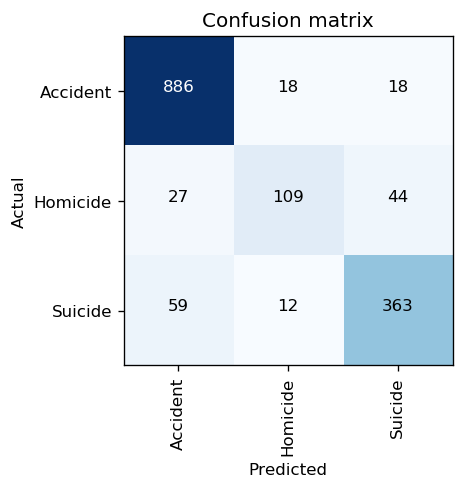

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

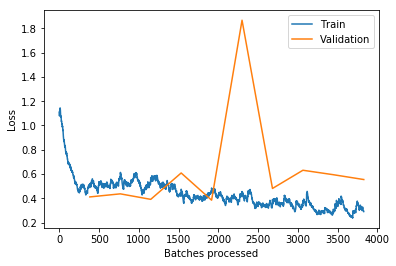

In [13]:
learn.recorder.plot_losses()

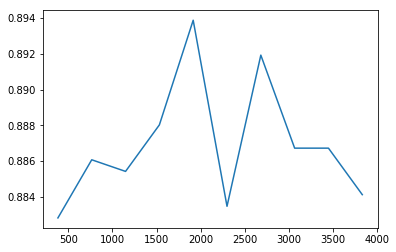

In [14]:
learn.recorder.plot_metrics()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_clas.valid_ds)==len(losses)==len(idxs)

True

In [16]:
loss = learn.recorder.losses

In [17]:
len(loss)

3830

In [18]:
len(learn.recorder.val_losses)

10

In [19]:
lrs = learn.recorder.lrs

In [20]:
len(lrs)

3830

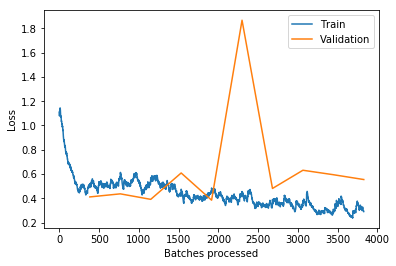

In [21]:
last = ifnone(None,len(learn.recorder.nb_batches))

_, ax = plt.subplots(1,1)
l_b = np.sum(learn.recorder.nb_batches[-last:])
iterations = range_of(learn.recorder.losses)[-l_b:]
ax.plot(iterations, learn.recorder.losses[-l_b:], label='Train')
val_iter = learn.recorder.nb_batches[-last:]
val_iter = np.cumsum(val_iter)+np.sum(learn.recorder.nb_batches[:-last])
ax.plot(val_iter, learn.recorder.val_losses[-last:], label='Validation')
ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

In [22]:
len(learn.metrics)

1

In [23]:
learn.metrics[0]

<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7fce003c8048>>

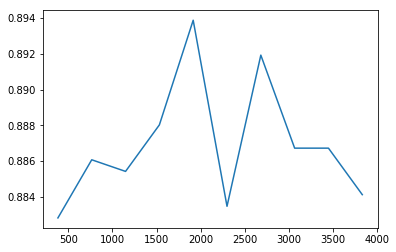

In [24]:
"Plot metrics collected during training."
assert len(learn.metrics) != 0, "There are no metrics to plot."
_, axes = plt.subplots(len(learn.metrics),1,figsize=(6, 4*len(learn.metrics)))
val_iter = learn.recorder.nb_batches
val_iter = np.cumsum(val_iter)
axes = axes.flatten() if len(learn.metrics) != 1 else [axes]
for i, ax in enumerate(axes):
    values = [met[i] for met in learn.recorder.metrics]
    ax.plot(val_iter, values)


In [25]:
learn.recorder.metrics

[[tensor(0.8828)],
 [tensor(0.8861)],
 [tensor(0.8854)],
 [tensor(0.8880)],
 [tensor(0.8939)],
 [tensor(0.8835)],
 [tensor(0.8919)],
 [tensor(0.8867)],
 [tensor(0.8867)],
 [tensor(0.8841)]]

In [26]:
val_iter

array([ 383,  766, 1149, 1532, 1915, 2298, 2681, 3064, 3447, 3830])

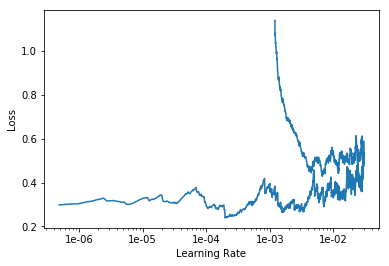

In [27]:
learn.recorder.plot()

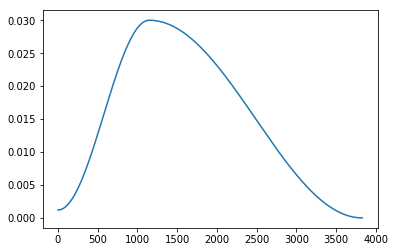

In [28]:
learn.recorder.plot_lr(show_moms=False)

In [29]:
learn.recorder.lrs

[0.0012,
 0.0012000538259760614,
 0.0012002153035018358,
 0.00120048443137016,
 0.001200861207569074,
 0.0012013456292818622,
 0.0012019376928870708,
 0.001202637393958532,
 0.0012034447272653986,
 0.0012043596867721863,
 0.0012053822656388179,
 0.0012065124562206583,
 0.0012077502500685948,
 0.0012090956379291022,
 0.0012105486097442816,
 0.0012121091546519608,
 0.0012137772609857773,
 0.0012155529162752483,
 0.0012174361072458742,
 0.0012194268198192429,
 0.001221525039113127,
 0.0012237307494415914,
 0.0012260439343151283,
 0.0012284645764407513,
 0.0012309926577221547,
 0.001233628159259835,
 0.0012363710613512296,
 0.0012392213434908664,
 0.001242178984370526,
 0.0012452439618793817,
 0.0012484162531041856,
 0.001251695834329429,
 0.0012550826810375157,
 0.001258576767908963,
 0.001262178068822565,
 0.0012658865568556076,
 0.0012697022042840699,
 0.0012736249825828182,
 0.0012776548624258283,
 0.0012817918136864039,
 0.0012860358054373987,
 0.0012903868059514524,
 0.00129484478270

In [30]:
learn.model.parameters

<bound method Module.parameters of SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(5281, 100, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(5281, 100, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNNLayer(
        (linear): WeightDropout(
          (module): Linear(in_features=200, out_features=300, bias=True)
        )
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=300, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=3, bias=True)
    )
  )
)>

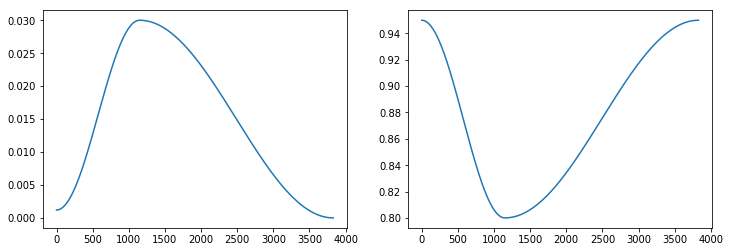

In [31]:
show_moms = True
"Plot learning rate, `show_moms` to include momentum."
iterations = range_of(learn.recorder.lrs)
if show_moms:
    _, axs = plt.subplots(1,2, figsize=(12,4))
    axs[0].plot(iterations, learn.recorder.lrs)
    axs[1].plot(iterations, learn.recorder.moms)
else: 
    plt.plot(iterations, learn.recorder.lrs)

In [32]:
learn.recorder.lrs

[0.0012,
 0.0012000538259760614,
 0.0012002153035018358,
 0.00120048443137016,
 0.001200861207569074,
 0.0012013456292818622,
 0.0012019376928870708,
 0.001202637393958532,
 0.0012034447272653986,
 0.0012043596867721863,
 0.0012053822656388179,
 0.0012065124562206583,
 0.0012077502500685948,
 0.0012090956379291022,
 0.0012105486097442816,
 0.0012121091546519608,
 0.0012137772609857773,
 0.0012155529162752483,
 0.0012174361072458742,
 0.0012194268198192429,
 0.001221525039113127,
 0.0012237307494415914,
 0.0012260439343151283,
 0.0012284645764407513,
 0.0012309926577221547,
 0.001233628159259835,
 0.0012363710613512296,
 0.0012392213434908664,
 0.001242178984370526,
 0.0012452439618793817,
 0.0012484162531041856,
 0.001251695834329429,
 0.0012550826810375157,
 0.001258576767908963,
 0.001262178068822565,
 0.0012658865568556076,
 0.0012697022042840699,
 0.0012736249825828182,
 0.0012776548624258283,
 0.0012817918136864039,
 0.0012860358054373987,
 0.0012903868059514524,
 0.00129484478270